# Objetivo del proyecto

Construir un modelo de clasificación para predecir si el individuo pertenece a el grupo de ingresos ">25K" o "<=25k"

#### Importación de librerías

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### Cargar el conjunto de datasets

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/reto_inegi_dataset.csv").copy()

<ipython-input-3-ba417697a42e>:1: DtypeWarning: Columns (83,84,167) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/gdrive/MyDrive/reto_inegi_dataset.csv").copy()


#### Filtración de datos a considerar

In [ ]:
df = df[df['edad'] >= 18]
df = df[df['ing_tri_total'].notna()]
df=df[['folioviv', 'foliohog', 'numren', 'parentesco', 'sexo', 'edad', 'madre_hog', 'padre_hog', 'hablaind', 'nivelaprob', 'edo_conyug', 'hor_1', 'atemed', 'num_trabaj', 'entidad', 'clave_max', 'disc_camin', 'disc_ver', 'disc_brazo', 'disc_apren', 'disc_oir', 'disc_vest', 'disc_habla', 'disc_acti', 'ing_tri_total', 'ing_tri_max', 'ss_aa', 'ss_mm', 'inscr_1', 'inscr_2', 'inscr_3', 'inscr_4', 'inscr_5',
                    'inscr_6','inscr_7', 'inscr_8' ]]

#### Creación de columna *target* binaria 'ing_binario'

In [ ]:
df['ing_binario'] = np.where(pd.notnull(df['ing_tri_total']) & (df['ing_tri_total'] < 25000), 0,
                             np.where(pd.notnull(df['ing_tri_total']) & (df['ing_tri_total'] >= 25000), 1, np.nan))

### Observación inicial de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180583 entries, 0 to 309682
Data columns (total 37 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   folioviv       180583 non-null  int64  
 1   foliohog       180583 non-null  int64  
 2   numren         180583 non-null  int64  
 3   parentesco     180583 non-null  int64  
 4   sexo           180583 non-null  int64  
 5   edad           180583 non-null  int64  
 6   madre_hog      180583 non-null  int64  
 7   padre_hog      180583 non-null  int64  
 8   hablaind       180583 non-null  object 
 9   nivelaprob     180583 non-null  object 
 10  edo_conyug     180583 non-null  object 
 11  hor_1          180583 non-null  object 
 12  atemed         180583 non-null  object 
 13  num_trabaj     180583 non-null  object 
 14  entidad        180583 non-null  int64  
 15  clave_max      180583 non-null  object 
 16  disc_camin     180583 non-null  object 
 17  disc_ver       180583 non-null  ob

In [ ]:
df.head(20)

,folioviv,foliohog,numren,parentesco,sexo,edad,madre_hog,padre_hog,hablaind,nivelaprob,...,ss_mm,inscr_1,inscr_2,inscr_3,inscr_4,inscr_5,inscr_6,inscr_7,inscr_8,ing_binario
0,100005002,1,1,101,2,91,2,2,2,2,...,,,,,,,,7,,0.0
1,100005002,1,2,301,2,48,1,2,2,4,...,,1,,,,,,,,1.0
3,100005003,1,1,101,1,68,2,2,2,4,...,0,1,,,,,,,,1.0
4,100005003,1,2,201,2,64,2,2,2,7,...,,1,,,,,,,,0.0
5,100005004,1,1,101,1,56,2,2,2,7,...,,,,,,,,,,1.0
7,100005004,1,3,301,1,30,1,1,2,7,...,0,1,,,,,,,,1.0
8,100012002,1,1,101,1,87,2,2,2,8,...,0,,2,,,,,,,1.0
9,100012002,1,2,201,2,80,2,2,2,2,...,,,,3,,,,,,0.0
12,100012002,2,1,101,1,27,2,2,2,4,...,0,,,,,,,,,0.0
13,100012004,1,1,101,1,57,2,2,2,4,...,,,,,,,,,,1.0


In [ ]:
df.describe()

,folioviv,foliohog,numren,parentesco,sexo,edad,madre_hog,padre_hog,entidad,ing_tri_total,ing_tri_max,ing_binario
count,1.805830e+05,180583.000000,180583.000000,180583.000000,180583.000000,180583.000000,180583.000000,180583.000000,180583.000000,1.805830e+05,1.805830e+05,180583.000000
mean,1.634755e+09,1.012000,1.897958,211.022582,1.473793,44.679566,1.775211,1.853209,16.098149,2.637773e+04,2.244066e+04,0.349933
std,9.276766e+08,0.121755,1.172033,146.956289,0.499314,17.626829,0.417444,0.353899,9.276999,5.361057e+04,4.984683e+04,0.476950
min,1.000050e+08,1.000000,1.000000,101.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.460000e+00,1.460000e+00,0.000000
25%,8.064689e+08,1.000000,1.000000,101.000000,1.000000,30.000000,2.000000,2.000000,8.000000,8.510860e+03,6.639340e+03,0.000000
50%,1.603701e+09,1.000000,2.000000,201.000000,1.000000,43.000000,2.000000,2.000000,16.000000,1.844021e+04,1.593442e+04,0.000000
75%,2.460136e+09,1.000000,2.000000,301.000000,2.000000,57.000000,2.000000,2.000000,24.000000,3.127866e+04,2.655737e+04,1.000000
max,3.260798e+09,5.000000,19.000000,623.000000,2.000000,109.000000,2.000000,2.000000,32.000000,6.854754e+06,6.854754e+06,1.000000


In [ ]:
df.shape

(180583, 37)

### Análisis univariado

#### Variables de discapacidad

In [ ]:
disc = df.loc[:, 'disc_camin':'disc_acti']
disc.head()

,disc_camin,disc_ver,disc_brazo,disc_apren,disc_oir,disc_vest,disc_habla,disc_acti
0,3,4,4,4,4,4,4,4
1,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4,4
4,4,4,4,4,4,4,4,4
5,4,4,4,4,4,4,4,4


In [ ]:
disc.isna().sum()

disc_camin    0
disc_ver      0
disc_brazo    0
disc_apren    0
disc_oir      0
disc_vest     0
disc_habla    0
disc_acti     0
dtype: int64

In [ ]:
disc['disc_camin'].unique()

array(['3', '4', '2', '1', '&'], dtype=object)

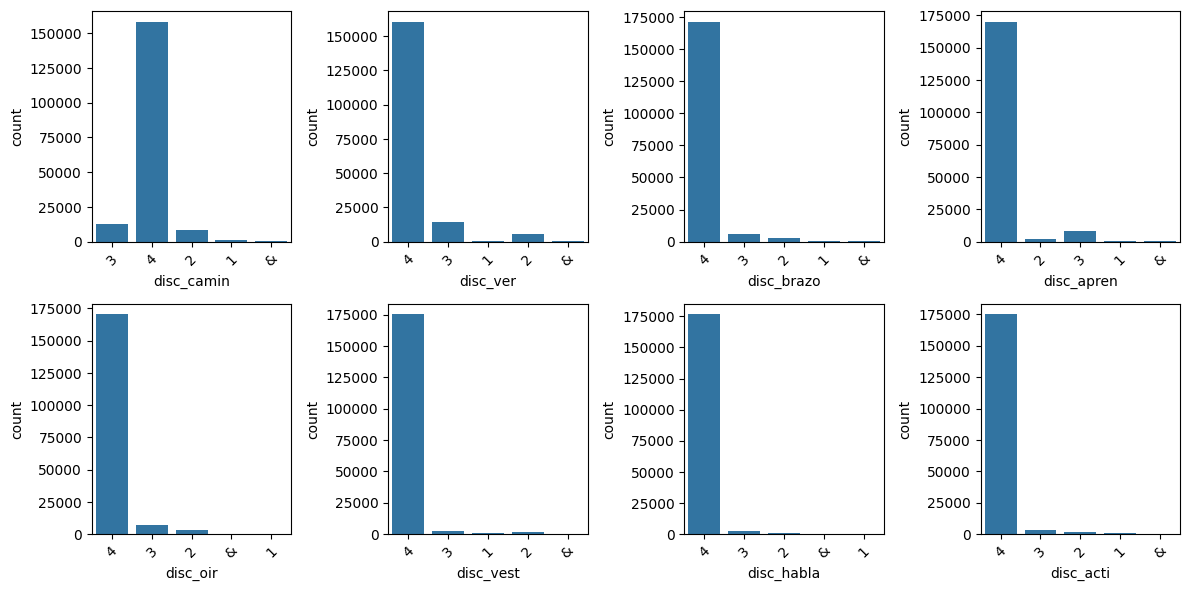

In [ ]:
fig, axes = plt.subplots(2,4, figsize=(12,6))
row = 0
column = 0

disc_df = df[['disc_camin', 'disc_ver', 'disc_brazo', 'disc_apren', 'disc_oir', 'disc_vest', 'disc_habla', 'disc_acti']]

for i, feature in enumerate(disc_df):
  sns.countplot(x=feature, data=disc_df,ax=axes[row][column])
  axes[row][column].tick_params(axis='x', rotation=45)
  if column == 3:
    column = 0
    row += 1
  else:
    column +=1
fig.tight_layout()
plt.show()

#### Variables sexo, madre_hog, padre_hog

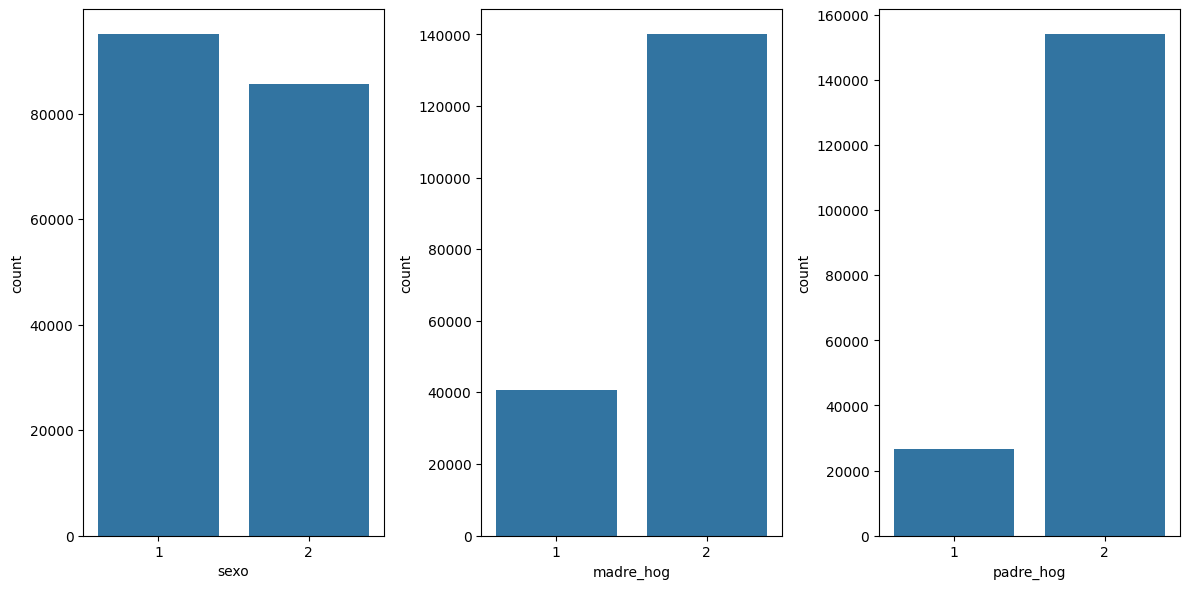

In [ ]:
selected_columns = ['sexo', 'madre_hog', 'padre_hog']

fig, axes = plt.subplots(1, 3, figsize=(12, 6))  # Solo 2 gráficos, así que 1 fila y 2 columnas

# Graficar
for i, feature in enumerate(selected_columns):
    sns.countplot(x=feature, data=df, ax=axes[i])

fig.tight_layout()
plt.show()

#### Variable hor_1

In [ ]:
df['hor_1'].unique()

array([' ', '48', '40', '12', '68', '50', '20', '70', '52', '36', '24',
       '49', '42', '45', '4', '46', '33', '28', '84', '16', '47', '56',
       '60', '51', '30', '14', '18', '25', '35', '78', '66', '27', '55',
       '19', '65', '32', '10', '54', '21', '72', '37', '64', '80', '15',
       '91', '38', '63', '5', '11', '3', '1', '6', '13', '69', '90', '96',
       '53', '75', '58', '8', '44', '92', '88', '57', '7', '59', '2', '9',
       '26', '43', '17', '34', '99', '39', '77', '22', '62', '73', '41',
       '61', '98', '89', '29', '112', '105', '23', '71', '31', '0', '86',
       '87', '79', '74', '76', '67', '85', '81', '94', '120', '82', '103',
       '150', '97', '83', '108', '100', '113', '95', '140', '143', '136',
       '168', '93', '156', '102', '115', '126', '160', '144', '125',
       '110', '154', '104', '119', '117', '130', '114', '118', '133',
       '116', '101'], dtype=object)

#### Variable de nivel escolar (nivelaprob)

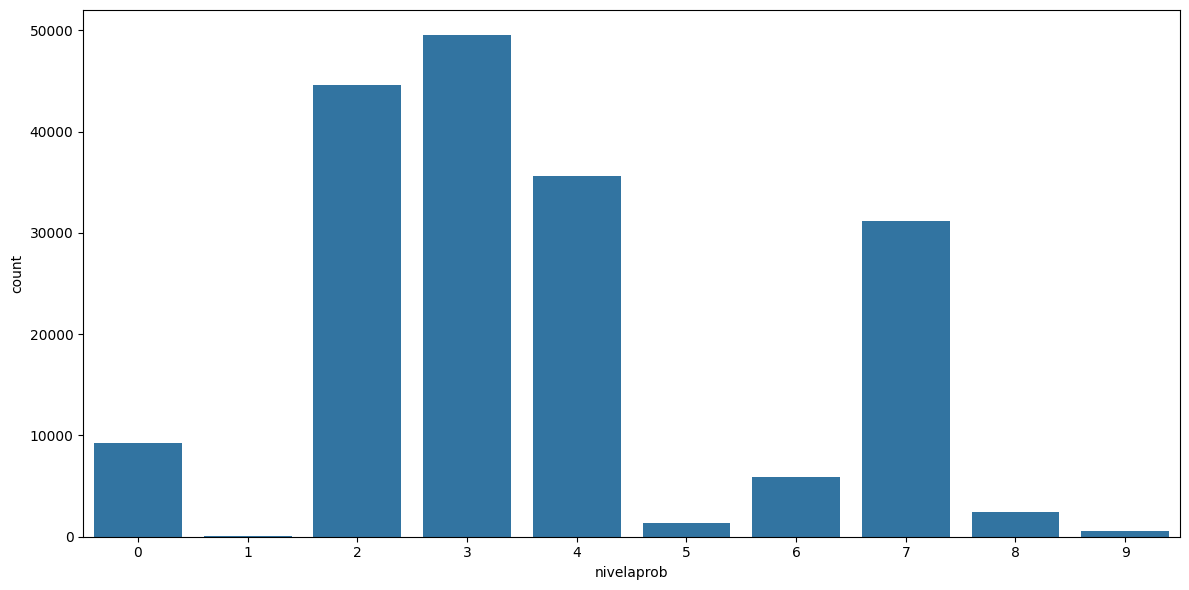

In [ ]:
selected_columns = ['nivelaprob']

df['nivelaprob'] = pd.Categorical(df['nivelaprob'], ordered=True, categories=sorted(df['nivelaprob'].unique()))

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.countplot(x=selected_columns[0], data=df, ax=ax)

fig.tight_layout()
plt.show()


####Variables de edad

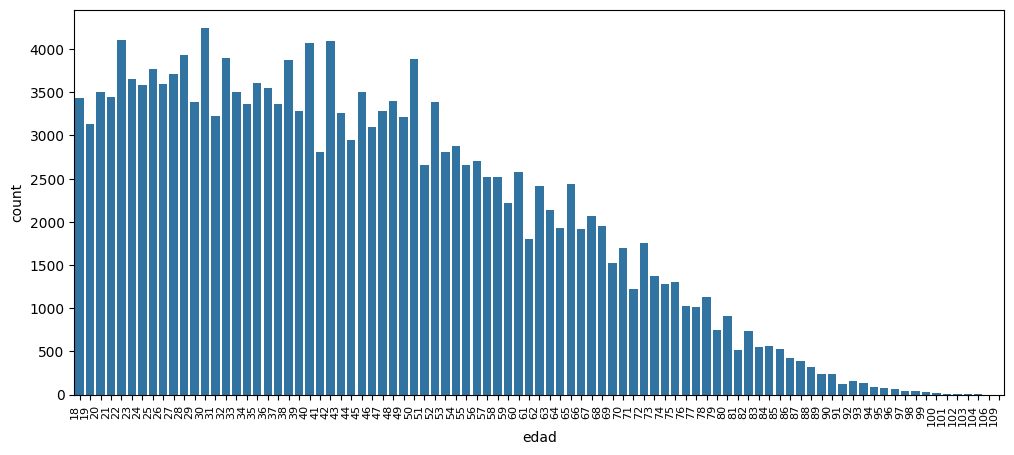

In [ ]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90, ha='right', fontsize=8)
fig.tight_layout()
ax = sns.countplot(x=df['edad'], data=df)
plt.show()

#### Variable clave_max

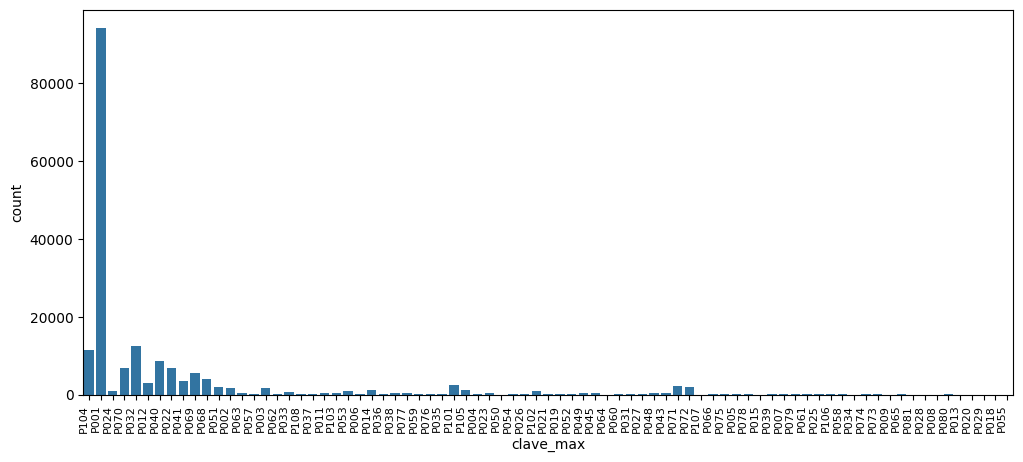

In [ ]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90, ha='right', fontsize=8)
fig.tight_layout()
ax = sns.countplot(x=df['clave_max'], data=df)
plt.show()

#### Variable de parentesco

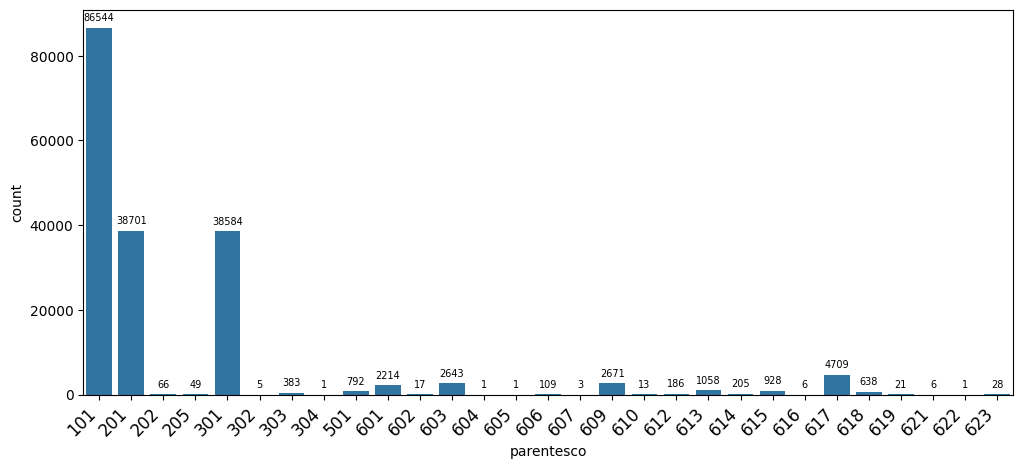

In [ ]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=45, ha='right', fontsize=12)
fig.tight_layout()
ax = sns.countplot(x=df['parentesco'], data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=7, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

#### Variable de entidad

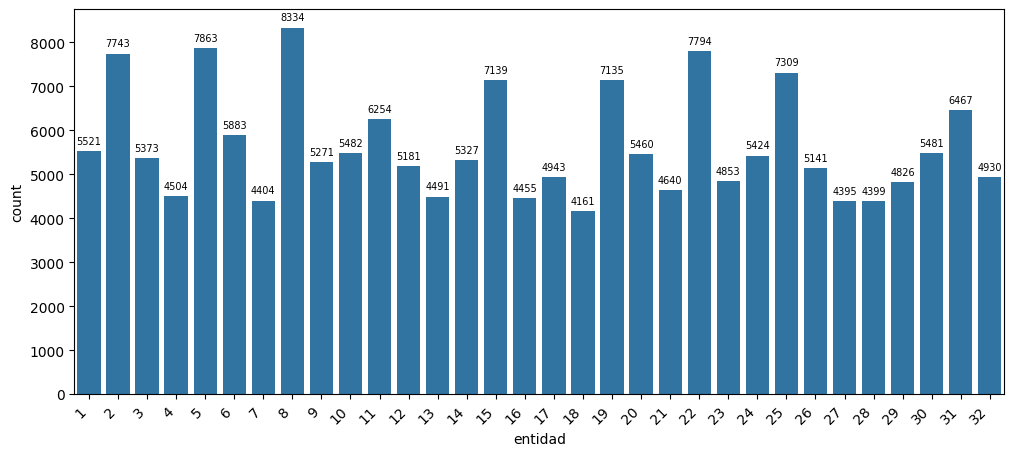

In [ ]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=45, ha='right', fontsize=10)
fig.tight_layout()
ax = sns.countplot(x=df['entidad'], data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=7, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

#### Variable ing_binario

In [ ]:
df['ing_binario'] = df['ing_binario'].astype(int)
df['ing_binario'].value_counts()

ing_binario
0    117391
1     63192
Name: count, dtype: int64

### Análisis bivariado

#### Variable sexo

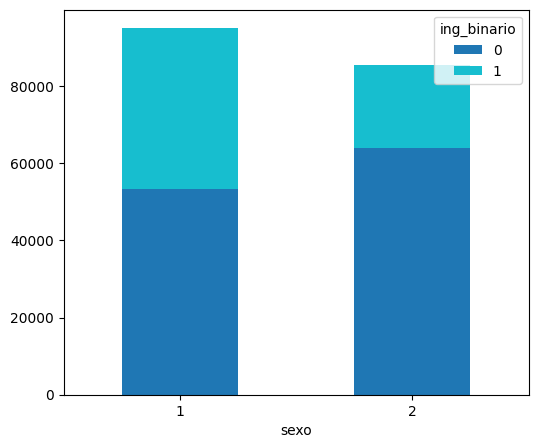

In [ ]:
variable = 'sexo'
target = 'ing_binario'

crosstab = pd.crosstab(df[variable], df[target])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

ax.set_xlabel(variable)
ax.legend(title=target, loc='upper right')

plt.xticks(rotation=0)

plt.show()


#### Variable edad

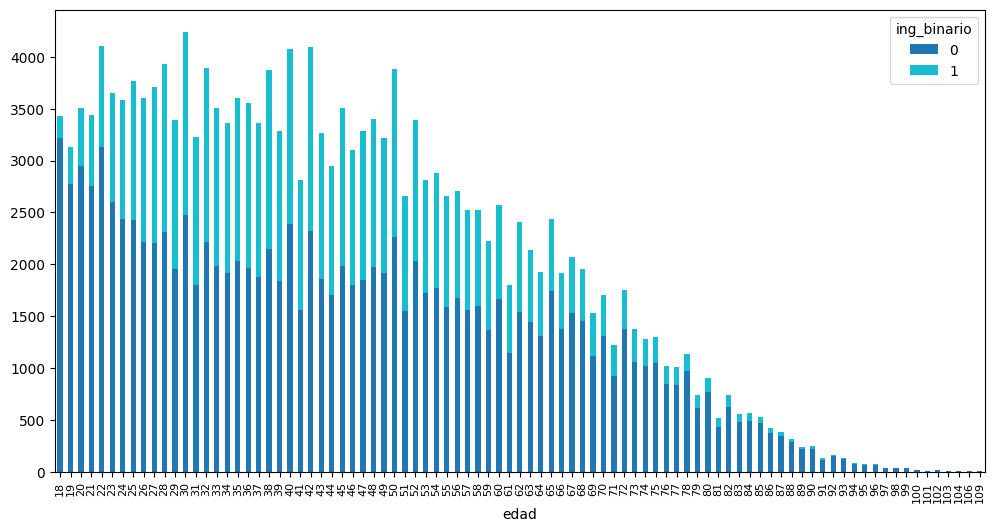

In [ ]:
variable = 'edad'
target = 'ing_binario'

crosstab = pd.crosstab(df[variable], df[target])

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

ax.set_xlabel(variable)
ax.legend(title=target, loc='upper right')

plt.xticks(rotation=90,fontsize=8)

plt.show()


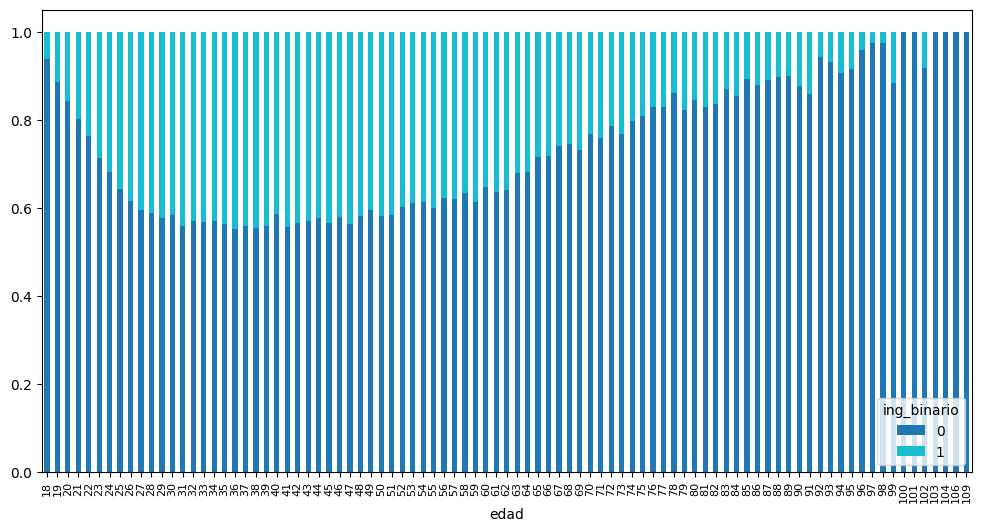

In [ ]:
variable = 'edad'
target = 'ing_binario'

crosstab = pd.crosstab(df[variable], df[target], normalize='index')

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

ax.set_xlabel(variable)
ax.legend(title=target, loc='lower right')

plt.xticks(rotation=90,fontsize=8)

plt.show()


#### Variable nivelaprob

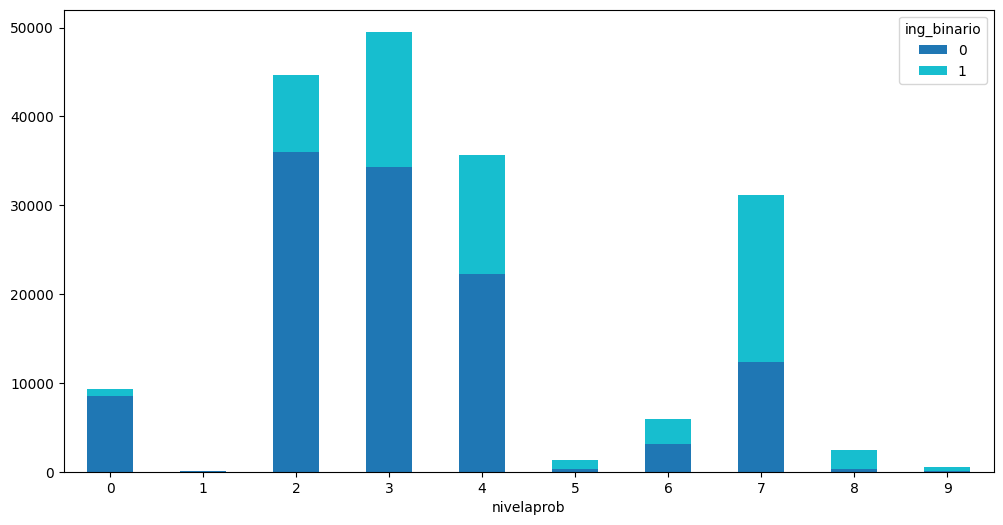

In [ ]:
variable = 'nivelaprob'
target = 'ing_binario'

crosstab = pd.crosstab(df[variable], df[target])

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

ax.set_xlabel(variable)
ax.legend(title=target, loc='upper right')

plt.xticks(rotation=0)

plt.show()


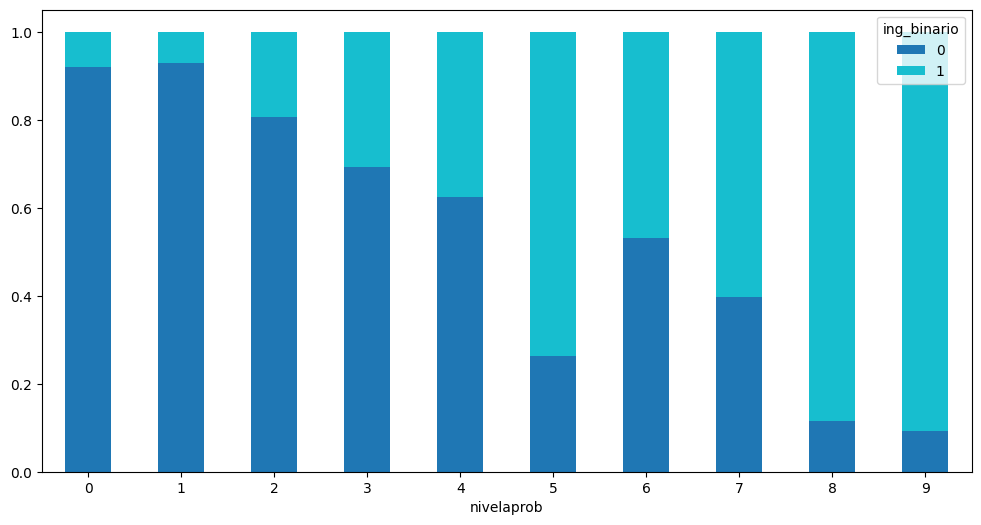

In [ ]:
variable = 'nivelaprob'
target = 'ing_binario'

crosstab = pd.crosstab(df[variable], df[target], normalize='index')

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

ax.set_xlabel(variable)
ax.legend(title=target, loc='upper right')

plt.xticks(rotation=0)

plt.show()


#### Variable edo_conyug

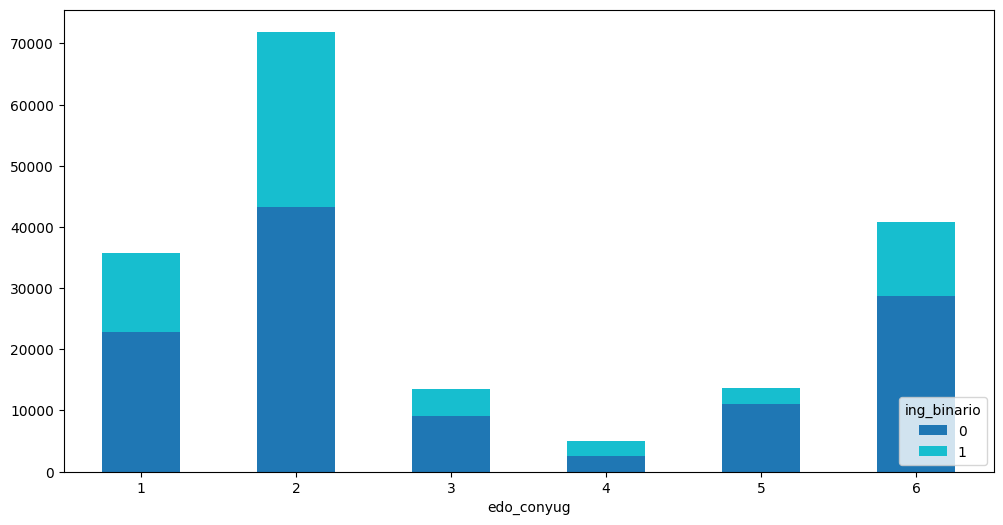

In [ ]:
variable = 'edo_conyug'
target = 'ing_binario'

crosstab = pd.crosstab(df[variable], df[target])

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

ax.set_xlabel(variable)
ax.legend(title=target, loc='lower right')

plt.xticks(rotation=0)

plt.show()


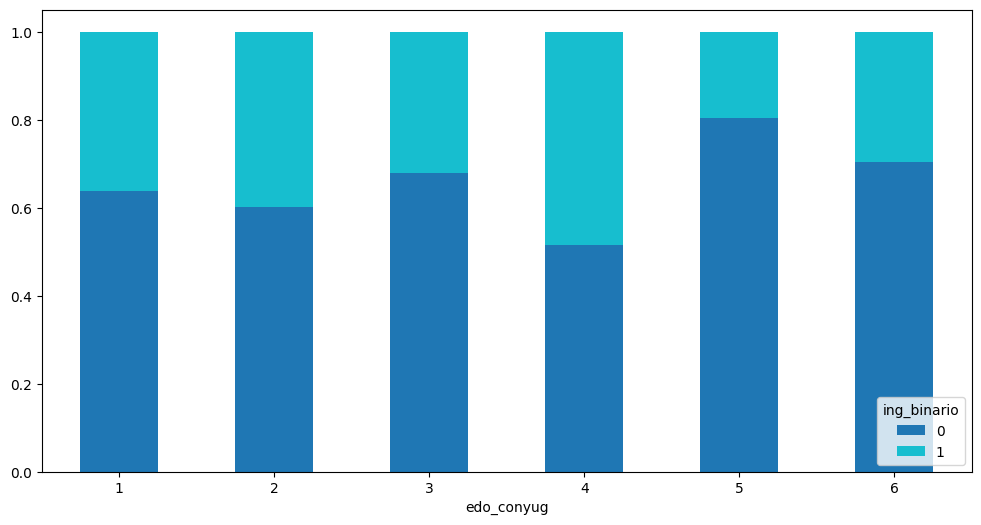

In [ ]:
variable = 'edo_conyug'
target = 'ing_binario'

crosstab = pd.crosstab(df[variable], df[target], normalize='index')

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

ax.set_xlabel(variable)
ax.legend(title=target, loc='lower right')

plt.xticks(rotation=0)

plt.show()


#### Variable hablaind

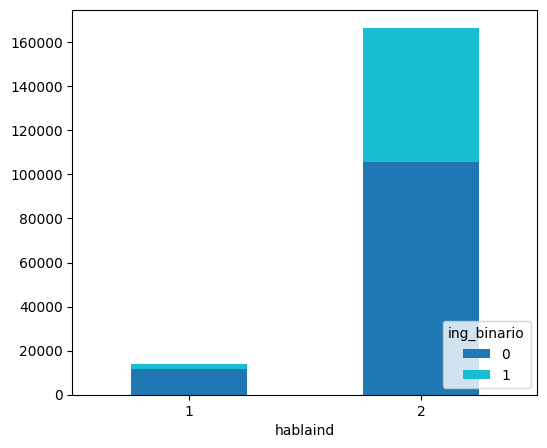

In [ ]:
variable = 'hablaind'
target = 'ing_binario'

crosstab = pd.crosstab(df[variable], df[target])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

ax.set_xlabel(variable)
ax.legend(title=target, loc='lower right')

plt.xticks(rotation=0)

plt.show()


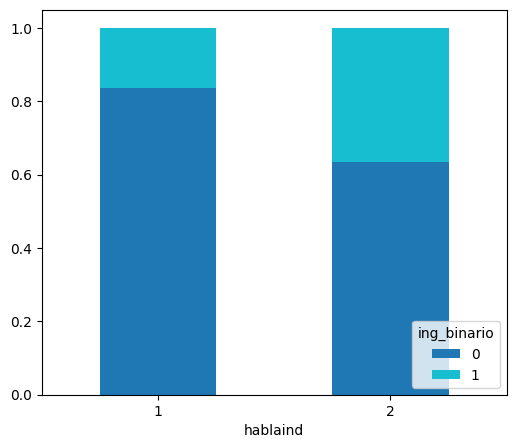

In [ ]:
variable = 'hablaind'
target = 'ing_binario'

crosstab = pd.crosstab(df[variable], df[target], normalize='index')

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

ax.set_xlabel(variable)
ax.legend(title=target, loc='lower right')

plt.xticks(rotation=0)

plt.show()


### Limpieza de datos

Se crea una copia del dataframe original

In [ ]:
df_1 = pd.DataFrame(df, copy=True)

#### Sustitución de celdas ' ' (con espacio) a np.nan

In [ ]:
df_1.replace(' ', np.nan, inplace=True)

In [ ]:
df_1.isna().sum()

folioviv              0
foliohog              0
numren                0
parentesco            0
sexo                  0
edad                  0
madre_hog             0
padre_hog             0
hablaind              0
nivelaprob            0
edo_conyug            0
hor_1             64372
atemed                0
num_trabaj        40841
entidad               0
clave_max             0
disc_camin            0
disc_ver              0
disc_brazo            0
disc_apren            0
disc_oir              0
disc_vest             0
disc_habla            0
disc_acti             0
ing_tri_total         0
ing_tri_max           0
ss_aa             82320
ss_mm             82320
inscr_1          127168
inscr_2          169095
inscr_3          166133
inscr_4          178288
inscr_5          177715
inscr_6          179017
inscr_7          174965
inscr_8          180361
ing_binario           0
dtype: int64

#### Variable atemed con incosistencias ('1', '2' y 1, 2)

In [ ]:
df_1['atemed'].value_counts()

atemed
1    54595
2    51981
2    38052
1    35955
Name: count, dtype: int64

In [ ]:
df_1['atemed'].unique()

array(['1', '2', 1, 2], dtype=object)

In [ ]:
df_1['atemed'] = df_1['atemed'].replace('2',2)
df_1['atemed'] = df_1['atemed'].replace('1',1)

#### Variables de discapacidad

Se observa que las discapacidades cuentan con un valor "&" extraño. Se eliminan estos valores haciendo una imputación por el valor más frecuente (4).

In [ ]:
df_1['disc_ver'].value_counts()

disc_ver
4    160227
3     14311
2      5273
1       534
&       238
Name: count, dtype: int64

In [ ]:
df_1.replace("&", "4", inplace=True)

In [ ]:
df_1['disc_apren'].value_counts()

disc_apren
4    170048
3      7850
2      2316
1       369
Name: count, dtype: int64

#### Variables de inscripción y afiliación a institución de salud

In [ ]:
df_1.loc[:, 'inscr_1':'inscr_8'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 180583 entries, 0 to 309682
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   inscr_1  53415 non-null  object
 1   inscr_2  11488 non-null  object
 2   inscr_3  14450 non-null  object
 3   inscr_4  2295 non-null   object
 4   inscr_5  2868 non-null   object
 5   inscr_6  1566 non-null   object
 6   inscr_7  5618 non-null   object
 7   inscr_8  222 non-null    object
dtypes: object(8)
memory usage: 12.4+ MB


In [ ]:
# Se listan todas las columnas a convertir de objeto a numericas
columnas_a_convertir = ['inscr_1', 'inscr_2', 'inscr_3', 'inscr_4', 'inscr_5',
                    'inscr_6','inscr_7', 'inscr_8']

# Luego, astype para convertir cada columna a int
for columna in columnas_a_convertir:
  # Limpiar la columna 'year' de valores no numéricos
  df[columna] = pd.to_numeric(df[columna], errors='coerce')


df['inscr'] = df[['inscr_1', 'inscr_2', 'inscr_3', 'inscr_4', 'inscr_5',
                    'inscr_6','inscr_7', 'inscr_8']].idxmax(axis=1)

# Elimina el prefijo común 'servmed_'
df['inscr'] = df['inscr'].str.replace('inscr_', '')
df['inscr'].value_counts()
df_1['inscr'] = df['inscr']
df_1['inscr'] = pd.to_numeric(df_1['inscr'], errors='coerce')

df_1['inscr'] = df_1['inscr'].replace({np.nan: 0})

#### Variables de contribución a la seguridad social

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Primero, lista todas las columnas que quieres convertir
columnas_a_convertir = ['ss_aa', 'ss_mm' ]

# Luego, usa el método astype para convertir cada columna a int
for columna in columnas_a_convertir:
  # Limpiar la columna de valores no numéricos
  df[columna] = pd.to_numeric(df[columna], errors='coerce')  # Convierte valores no numéricos a NaN

  # Crear un imputador con la estrategia de la media
  #imputer = SimpleImputer(strategy='mean')

  # Aplicar el imputador y transformar la columna 'year'
  #df_3[columna] = imputer.fit_transform(df_3[[columna]])

df['seg_meses_tot'] = df['ss_aa'] * 12 + df['ss_mm']

# Imputar los valores faltantes con la media
mean_total_months = df['seg_meses_tot'].mean()
df['seg_meses_tot'].fillna(mean_total_months, inplace=True)
df_1['seg_meses_tot'] = df['seg_meses_tot']




#### Imputación de num_trabaj

In [ ]:
df_trabaj = df_1.loc[df_1['num_trabaj'].isna(), ['edad', 'hor_1', 'ing_tri_total']]

In [ ]:
df_trabaj.head(20)

,edad,hor_1,ing_tri_total
0,91,NaN,7434.78
8,87,NaN,84888.58
9,80,NaN,5649.45
18,19,NaN,586.95
21,75,NaN,79019.01
26,70,NaN,5649.45
32,73,NaN,76989.12
33,64,NaN,85695.64
37,55,NaN,79239.12
40,58,NaN,12913.04


In [ ]:
df_trabaj['hor_1'].isna().sum()

38138

In [ ]:
df_trabaj.shape

(40841, 3)

In [ ]:
df_trabaj.loc[df_trabaj['hor_1'].notna()].head(20)

,edad,hor_1,ing_tri_total
252,51,10,55081.96
282,23,40,15652.17
310,78,4,6049.17
394,69,16,14453.79
447,61,10,2249.99
448,25,32,489.13
579,35,32,994.47
582,62,3,1392.26
684,22,36,12859.23
1382,18,35,4402.17


In [ ]:
df_trabaj.loc[df_trabaj['hor_1'].isna(), 'edad'].describe()

count    38138.000000
mean        57.712832
std         21.191498
min         18.000000
25%         40.000000
50%         64.000000
75%         74.000000
max        109.000000
Name: edad, dtype: float64

In [ ]:
df_1['edad'].describe()

count    180583.000000
mean         44.679566
std          17.626829
min          18.000000
25%          30.000000
50%          43.000000
75%          57.000000
max         109.000000
Name: edad, dtype: float64

In [ ]:
df_trabaj.loc[(df_trabaj['edad'] < 40) & (df_trabaj['hor_1'].isna())].describe()

,edad,ing_tri_total
count,9382.000000,9382.000000
mean,26.317843,9141.777248
std,6.458367,16341.138807
min,18.000000,9.780000
25%,21.000000,1643.470000
50%,25.000000,3913.040000
75%,32.000000,10565.210000
max,39.000000,295508.140000


In [ ]:
df_trabaj.loc[df_trabaj['ing_tri_total'] == 295508.14]

,edad,hor_1,ing_tri_total
247423,24,NaN,295508.14


In [ ]:
df_trabaj.loc[df_trabaj['hor_1'].notna(), 'hor_1'].astype(int).describe()

count    2703.000000
mean       18.732889
std        18.623516
min         0.000000
25%         5.000000
50%        10.000000
75%        28.000000
max       168.000000
Name: hor_1, dtype: float64

In [ ]:
df_1['hor_1'] = df_1['hor_1'].astype(float)

In [ ]:
df_trabaj.loc[(df_trabaj['edad'] >= 40) & df_trabaj['hor_1'].isna()]

,edad,hor_1,ing_tri_total
0,91,NaN,7434.78
8,87,NaN,84888.58
9,80,NaN,5649.45
21,75,NaN,79019.01
26,70,NaN,5649.45
...,...,...,...
309637,85,NaN,8315.21
309638,68,NaN,8364.12
309644,72,NaN,40499.99
309650,84,NaN,8520.48


In [ ]:
df_1.loc[(df_1['num_trabaj'].isna()) & (df_1['hor_1'].isna()) & (df_1['edad'] >= 40), ['num_trabaj', 'hor_1']] = 0
df_1.loc[(df_1['num_trabaj'].isna()) & (df_1['hor_1'].notna()) & (df_1['hor_1'] > 0), 'num_trabaj'] = 1
df_1.loc[(df_1['num_trabaj'].isna()) & (df_1['hor_1'].notna()) & (df_1['hor_1'] == 0), 'num_trabaj'] = 0

In [ ]:
df_1['num_trabaj'].fillna(0, inplace=True)

In [ ]:
df_1.isna().sum()

folioviv              0
foliohog              0
numren                0
parentesco            0
sexo                  0
edad                  0
madre_hog             0
padre_hog             0
hablaind              0
nivelaprob            0
edo_conyug            0
hor_1             35616
atemed                0
num_trabaj            0
entidad               0
clave_max             0
disc_camin            0
disc_ver              0
disc_brazo            0
disc_apren            0
disc_oir              0
disc_vest             0
disc_habla            0
disc_acti             0
ing_tri_total         0
ing_tri_max           0
ss_aa             82320
ss_mm             82320
inscr_1          127168
inscr_2          169095
inscr_3          166133
inscr_4          178288
inscr_5          177715
inscr_6          179017
inscr_7          174965
inscr_8          180361
ing_binario           0
inscr                 0
seg_meses_tot         0
dtype: int64

#### Imputación de hor_1

In [ ]:
df_trabaj_horNa = df_trabaj.loc[df_trabaj['hor_1'].isna()]

In [ ]:
df_trabaj_horNa['edad'].describe()

count    38138.000000
mean        57.712832
std         21.191498
min         18.000000
25%         40.000000
50%         64.000000
75%         74.000000
max        109.000000
Name: edad, dtype: float64

In [ ]:
df_1['hor_1'].fillna(df_trabaj_horNa['edad'].mean(), inplace=True)

In [ ]:
df_1.isna().sum()

folioviv              0
foliohog              0
numren                0
parentesco            0
sexo                  0
edad                  0
madre_hog             0
padre_hog             0
hablaind              0
nivelaprob            0
edo_conyug            0
hor_1                 0
atemed                0
num_trabaj            0
entidad               0
clave_max             0
disc_camin            0
disc_ver              0
disc_brazo            0
disc_apren            0
disc_oir              0
disc_vest             0
disc_habla            0
disc_acti             0
ing_tri_total         0
ing_tri_max           0
ss_aa             82320
ss_mm             82320
inscr_1          127168
inscr_2          169095
inscr_3          166133
inscr_4          178288
inscr_5          177715
inscr_6          179017
inscr_7          174965
inscr_8          180361
ing_binario           0
inscr                 0
seg_meses_tot         0
dtype: int64

In [ ]:
df_1.head()

,folioviv,foliohog,numren,parentesco,sexo,edad,madre_hog,padre_hog,hablaind,nivelaprob,...,inscr_2,inscr_3,inscr_4,inscr_5,inscr_6,inscr_7,inscr_8,ing_binario,inscr,seg_meses_tot
0,100005002,1,1,101,2,91,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,7,NaN,0,7.0,145.238228
1,100005002,1,2,301,2,48,1,2,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,145.238228
3,100005003,1,1,101,1,68,2,2,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,312.000000
4,100005003,1,2,201,2,64,2,2,2,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,145.238228
5,100005004,1,1,101,1,56,2,2,2,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,145.238228


Se rellenan los valores faltantes utilizando

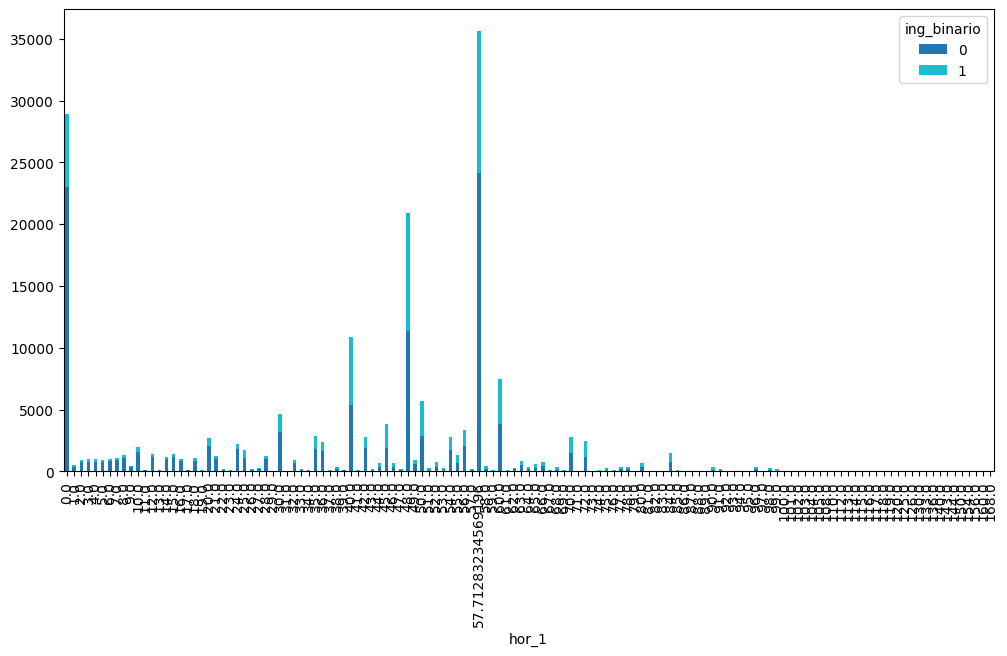

In [ ]:
variable = 'hor_1'
target = 'ing_binario'

crosstab = pd.crosstab(df_1[variable], df[target])

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

ax.set_xlabel(variable)
ax.legend(title=target, loc='upper right')

plt.xticks(rotation=90)

plt.show()

### Feature engineering

#### Adición de variable 'discapacidad'

Se condensan todas las columnas de discapacidades en una sola columna que indica directamente si se tiene o no alguna de ellas.

Se convierten todas las columnas de discapacidades a numéricas.

In [ ]:
discapacidades = ['disc_ver', 'disc_brazo', 'disc_apren', 'disc_oir', 'disc_vest', 'disc_habla', 'disc_acti']
for disc in discapacidades:
  df_1[disc] = pd.to_numeric(df_1[disc])

In [ ]:
discapacidades = ['disc_ver', 'disc_brazo', 'disc_apren', 'disc_oir', 'disc_vest', 'disc_habla', 'disc_acti']
for disc in discapacidades:
  print(df_1[disc].dtype)

int64
int64
int64
int64
int64
int64
int64


Se crea la columna 'discapacidad'.

In [ ]:
df_1['discapacidad'] = np.where(
    (df_1["disc_ver"] < 4) | (df_1["disc_brazo"] < 4) | (df_1["disc_apren"] < 4) |
    (df_1["disc_oir"] < 4) | (df_1["disc_vest"] < 4) | (df_1["disc_habla"] < 4) |
    (df_1["disc_acti"] < 4), 1, 0
)

In [ ]:
df_1.shape

(180583, 40)

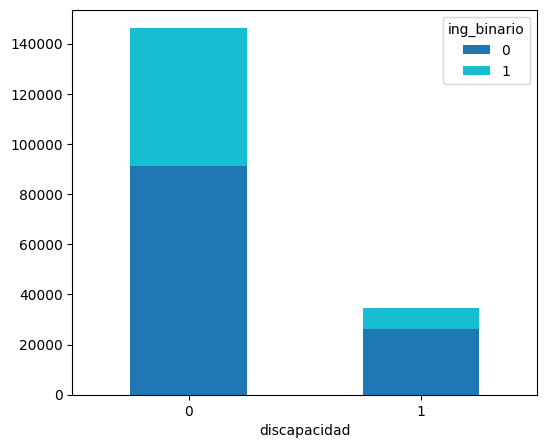

In [ ]:
variable = 'discapacidad'
target = 'ing_binario'

crosstab = pd.crosstab(df_1[variable], df[target])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

ax.set_xlabel(variable)
ax.legend(title=target, loc='upper right')

plt.xticks(rotation=0)

plt.show()

#### Agrupación de entidades por zona (norte, centro y sur)

In [ ]:
norte = [2,3,5,8,10,19,24,25,26,28,32]
centro = [1,9,11,13,14,15,16,17,18,22,29]
sur = [4,6,7,12,20,21,23,27,30,31]

df_1['zona'] = df_1['entidad'].astype(int)
df_1['zona'] = df_1['zona'].apply(lambda x: 100 if x in norte else x)
df_1['zona'] = df_1['zona'].apply(lambda x: 200 if x in centro else x)
df_1['zona'] = df_1['zona'].apply(lambda x: 300 if x in sur else x)

In [ ]:
df_1['zona'].value_counts()

zona
100    69133
200    60182
300    51268
Name: count, dtype: int64

Se grafica la nueva distribución de la población por zonas.

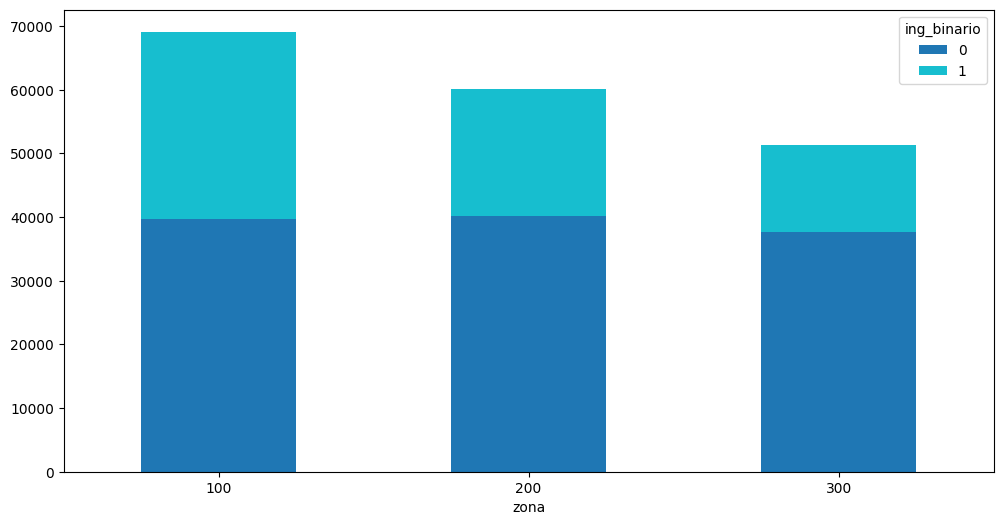

In [ ]:
variable = 'zona'
target = 'ing_binario'

crosstab = pd.crosstab(df_1[variable], df[target])

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

ax.set_xlabel(variable)
ax.legend(title=target, loc='upper right')

plt.xticks(rotation=0)

plt.show()

#### Creación de variable de 'asalariado'

In [ ]:
df_1['asalariado'] = df_1['clave_max'].apply(lambda x: 1 if x == 'P001' else 2)

Se grafica la nueva distribución

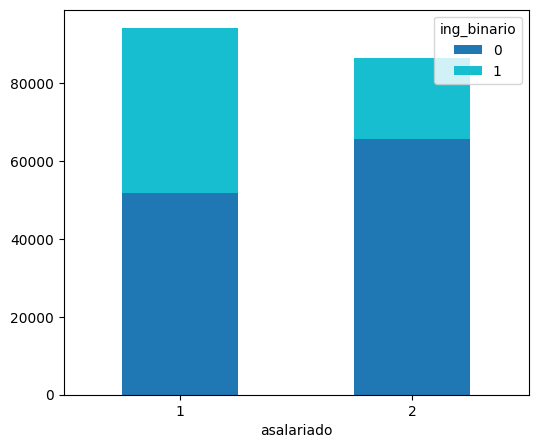

In [ ]:
variable = 'asalariado'
target = 'ing_binario'

crosstab = pd.crosstab(df_1[variable], df_1[target])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

ax.set_xlabel(variable)
ax.legend(title=target, loc='upper right')

plt.xticks(rotation=0)

plt.show()


#### Agrupamiento de nivelaprob en 3 niveles (básico, medio, avanzado)

Observamos el estado original

In [ ]:
df_1['nivelaprob'] = df_1['nivelaprob'].astype(int)
df_1['nivelaprob'].value_counts()

nivelaprob
3    49534
2    44611
4    35659
7    31147
0     9266
6     5930
8     2466
5     1347
9      552
1       71
Name: count, dtype: int64

In [ ]:
mapping = {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 2}
df_1['nivelaprob'] = df_1['nivelaprob'].map(mapping)

In [ ]:
df_1['nivelaprob'].value_counts()

nivelaprob
1    86540
0    53948
2    40095
Name: count, dtype: int64

Verificamos el mapeo

In [ ]:
df_1['nivelaprob'].value_counts()

nivelaprob
1    86540
0    53948
2    40095
Name: count, dtype: int64

In [ ]:
df_1['nivelaprob']

0         0
1         1
3         1
4         2
5         2
         ..
309673    0
309675    0
309679    1
309681    2
309682    2
Name: nivelaprob, Length: 180583, dtype: int64

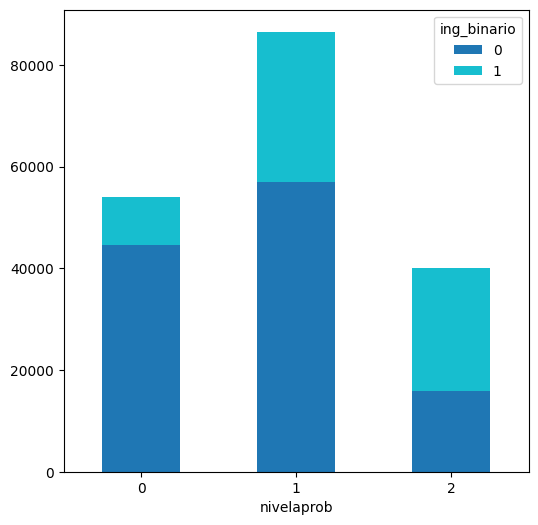

In [ ]:
variable = 'nivelaprob'
target = 'ing_binario'

crosstab = pd.crosstab(df_1[variable], df[target])

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

ax.set_xlabel(variable)
ax.legend(title=target, loc='upper right')

plt.xticks(rotation=0)

plt.show()

#### Conversión de edo_conyug a en_pareja

In [ ]:
mapping = {0: 1, 1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2}
df_1['en_pareja'] = df_1['edo_conyug'].astype(int).map(mapping)

In [ ]:
df_1['en_pareja'].value_counts()

en_pareja
1    107662
2     72921
Name: count, dtype: int64

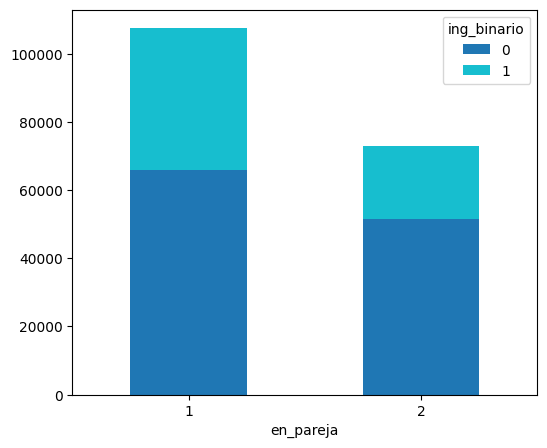

In [ ]:
variable = 'en_pareja'
target = 'ing_binario'

crosstab = pd.crosstab(df_1[variable], df[target])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

ax.set_xlabel(variable)
ax.legend(title=target, loc='upper right')

plt.xticks(rotation=0)

plt.show()

#### Conversión de parentesco a es_jefe

In [ ]:
df_1['es_jefe'] = df_1['parentesco'].apply(lambda x: 1 if x == 101 else 2)

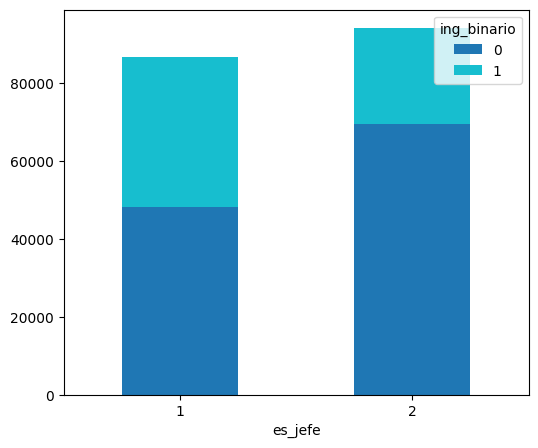

In [ ]:
variable = 'es_jefe'
target = 'ing_binario'

crosstab = pd.crosstab(df_1[variable], df[target])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

ax.set_xlabel(variable)
ax.legend(title=target, loc='upper right')

plt.xticks(rotation=0)

plt.show()

In [ ]:
df_1.columns

Index(['folioviv', 'foliohog', 'numren', 'parentesco', 'sexo', 'edad',
       'madre_hog', 'padre_hog', 'hablaind', 'nivelaprob', 'edo_conyug',
       'hor_1', 'atemed', 'num_trabaj', 'entidad', 'clave_max', 'disc_camin',
       'disc_ver', 'disc_brazo', 'disc_apren', 'disc_oir', 'disc_vest',
       'disc_habla', 'disc_acti', 'ing_tri_total', 'ing_tri_max', 'ss_aa',
       'ss_mm', 'inscr_1', 'inscr_2', 'inscr_3', 'inscr_4', 'inscr_5',
       'inscr_6', 'inscr_7', 'inscr_8', 'ing_binario', 'inscr',
       'seg_meses_tot', 'discapacidad', 'zona', 'asalariado', 'en_pareja',
       'es_jefe'],
      dtype='object')

#### Columnas preliminares

In [ ]:
df_2 = df_1[['folioviv','foliohog','numren','sexo', 'edad','madre_hog', 'padre_hog', 'hablaind',
             'es_jefe', 'nivelaprob', 'en_pareja', 'hor_1', 'atemed', 'num_trabaj', 'zona',
             'discapacidad', 'asalariado', 'inscr', 'seg_meses_tot', 'ing_binario']]

### Matriz de correlación

In [ ]:
MC = df_2.iloc[:,3:-1]
MC

,sexo,edad,madre_hog,padre_hog,hablaind,es_jefe,nivelaprob,en_pareja,hor_1,atemed,num_trabaj,zona,discapacidad,asalariado,inscr,seg_meses_tot
0,2,91,2,2,2,1,0,2,0.000000,1,0,200,0,2,7.0,145.238228
1,2,48,1,2,2,2,1,2,48.000000,1,1,200,0,1,1.0,145.238228
3,1,68,2,2,2,1,1,1,40.000000,1,1,200,0,1,1.0,312.000000
4,2,64,2,2,2,2,2,1,12.000000,1,1,200,0,2,1.0,145.238228
5,1,56,2,2,2,1,2,1,68.000000,2,1,200,0,2,0.0,145.238228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309673,2,50,2,2,2,2,0,1,57.712832,2,1,100,0,1,0.0,145.238228
309675,1,37,2,2,2,1,0,1,42.000000,2,1,100,1,1,0.0,145.238228
309679,1,63,2,2,2,1,1,1,56.000000,2,1,100,1,2,0.0,145.238228
309681,1,29,2,2,2,1,2,1,48.000000,2,1,100,0,2,0.0,145.238228


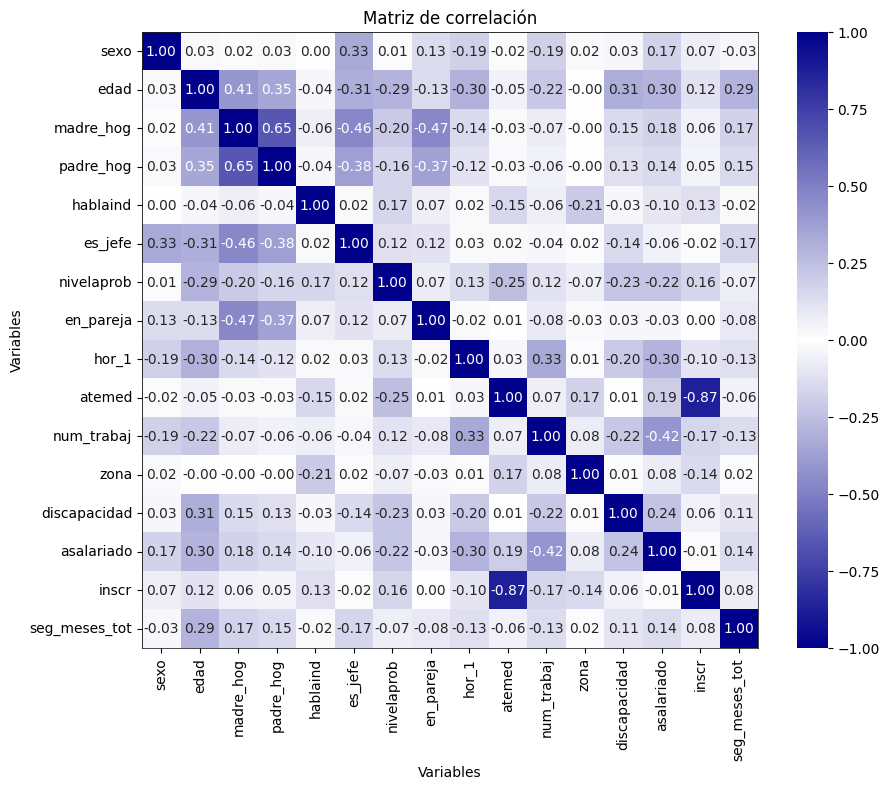

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Define the custom colormap
colors = ["darkblue", "white", "darkblue"]
n_bins = 200  # Discretizes the interpolation into bins
cmap_name = 'DB-W-DB'

# Create the colormap
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Compute the correlation matrix
corr = MC.corr(method='kendall')

# Plot the heatmap without internal square lines
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, annot=True, fmt=".2f", cbar=True,
                 linewidths=0, square=True)

# Add axis labels and title
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Matriz de correlación')

# Customize the exterior outline
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(0.5)

# Draw a rectangle around the heatmap to create an external outline
rect = plt.Rectangle((0, 0), len(corr.columns), len(corr.columns), fill=False,
                     edgecolor='gray', linewidth=0.5)
ax.add_patch(rect)

# Show the plot (optional, can be removed if not needed)
plt.show()

### Exportación del dataset

Columnas finales

In [ ]:
# elegir las columnas finales
df_3 = df_2[['folioviv','foliohog','numren','sexo', 'edad', 'hablaind',
             'es_jefe', 'nivelaprob', 'en_pareja', 'inscr', 'num_trabaj', 'zona',
             'discapacidad', 'asalariado', 'seg_meses_tot', 'ing_binario']]

In [ ]:
# descomentar la linea de abajo para exportar
# df_3.to_csv('inegi_selection_final_1.csv', index=False)